In [3]:
import sys as _sys
import os as _os
import numpy as _np
import random as _random
from math import sqrt as _sqrt

# if __package__ is None or __package__ == '':
#     import vambtools as _vambtools
#     from cluster import _distances_to_vector as _distance
    
# else:
#     import vamb.vambtools as _vambtools
#     from vamb.cluster import _distances_to_vector as _distance
    
if __name__ == '__main__':
    import argparse

# Here, add the path of the "vamb" directory

# And the path to Metabat latent rep

In [6]:
latentpath = '/home/jakni/Downloads/binningexample/metabat_latent.tsv.gz'

_sys.path.append('..')
import vambtools as _vambtools
from cluster import _distances_to_vector as _distance

In [82]:
# This is the PDF of normal with µ=0, s=0.015 from -0.4975 to 0.4975 with intervals
# of 0.005, for a total of 200 values

NORMALPDF = _np.array([3.60430797e-238, 2.15804846e-233, 1.15623351e-228, 5.54338405e-224,
       2.37820584e-219, 9.12996205e-215, 3.13641528e-210, 9.64146896e-206,
       2.65214895e-201, 6.52826346e-197, 1.43794572e-192, 2.83421224e-188,
       4.99881774e-184, 7.88946029e-180, 1.11422358e-175, 1.40812903e-171,
       1.59241997e-167, 1.61145372e-163, 1.45922787e-159, 1.18242459e-155,
       8.57371116e-152, 5.56300308e-148, 3.22994265e-144, 1.67812914e-140,
       7.80191120e-137, 3.24579947e-133, 1.20833520e-129, 4.02529972e-126,
       1.19992494e-122, 3.20077386e-119, 7.64013375e-116, 1.63189416e-112,
       3.11909121e-109, 5.33469037e-106, 8.16460951e-103, 1.11816702e-099,
       1.37032314e-096, 1.50274180e-093, 1.47465625e-090, 1.29491805e-087,
       1.01751034e-084, 7.15451889e-082, 4.50160201e-079, 2.53453805e-076,
       1.27695499e-073, 5.75701585e-071, 2.32254596e-068, 8.38448255e-066,
       2.70852764e-063, 7.82952357e-061, 2.02526780e-058, 4.68786004e-056,
       9.70983553e-054, 1.79967535e-051, 2.98484319e-049, 4.42990007e-047,
       5.88316998e-045, 6.99155730e-043, 7.43500909e-041, 7.07512543e-039,
       6.02465026e-037, 4.59065437e-035, 3.13013024e-033, 1.90983249e-031,
       1.04273321e-029, 5.09443694e-028, 2.22722572e-026, 8.71319300e-025,
       3.05025039e-023, 9.55517636e-022, 2.67847120e-020, 6.71862360e-019,
       1.50806027e-017, 3.02902003e-016, 5.44415709e-015, 8.75596887e-014,
       1.26015169e-012, 1.62288036e-011, 1.87023094e-010, 1.92863049e-009,
       1.77970441e-008, 1.46957509e-007, 1.08587728e-006, 7.17984003e-006,
       4.24809135e-005, 2.24914774e-004, 1.06558274e-003, 4.51753399e-003,
       1.71380237e-002, 5.81788463e-002, 1.76731730e-001, 4.80406651e-001,
       1.16855337e+000, 2.54350823e+000, 4.95407757e+000, 8.63450638e+000,
       1.34665790e+001, 1.87941250e+001, 2.34710218e+001, 2.62293144e+001,
       2.62293144e+001, 2.34710218e+001, 1.87941250e+001, 1.34665790e+001,
       8.63450638e+000, 4.95407757e+000, 2.54350823e+000, 1.16855337e+000,
       4.80406651e-001, 1.76731730e-001, 5.81788463e-002, 1.71380237e-002,
       4.51753399e-003, 1.06558274e-003, 2.24914774e-004, 4.24809135e-005,
       7.17984003e-006, 1.08587728e-006, 1.46957509e-007, 1.77970441e-008,
       1.92863049e-009, 1.87023094e-010, 1.62288036e-011, 1.26015169e-012,
       8.75596887e-014, 5.44415709e-015, 3.02902003e-016, 1.50806027e-017,
       6.71862360e-019, 2.67847120e-020, 9.55517636e-022, 3.05025039e-023,
       8.71319300e-025, 2.22722572e-026, 5.09443694e-028, 1.04273321e-029,
       1.90983249e-031, 3.13013024e-033, 4.59065437e-035, 6.02465026e-037,
       7.07512543e-039, 7.43500909e-041, 6.99155730e-043, 5.88316998e-045,
       4.42990007e-047, 2.98484319e-049, 1.79967535e-051, 9.70983553e-054,
       4.68786004e-056, 2.02526780e-058, 7.82952357e-061, 2.70852764e-063,
       8.38448255e-066, 2.32254596e-068, 5.75701585e-071, 1.27695499e-073,
       2.53453805e-076, 4.50160201e-079, 7.15451889e-082, 1.01751034e-084,
       1.29491805e-087, 1.47465625e-090, 1.50274180e-093, 1.37032314e-096,
       1.11816702e-099, 8.16460951e-103, 5.33469037e-106, 3.11909121e-109,
       1.63189416e-112, 7.64013375e-116, 3.20077386e-119, 1.19992494e-122,
       4.02529972e-126, 1.20833520e-129, 3.24579947e-133, 7.80191120e-137,
       1.67812914e-140, 3.22994265e-144, 5.56300308e-148, 8.57371116e-152,
       1.18242459e-155, 1.45922787e-159, 1.61145372e-163, 1.59241997e-167,
       1.40812903e-171, 1.11422358e-175, 7.88946029e-180, 4.99881774e-184,
       2.83421224e-188, 1.43794572e-192, 6.52826346e-197, 2.65214895e-201,
       9.64146896e-206, 3.13641528e-210, 9.12996205e-215, 2.37820584e-219,
       5.54338405e-224, 1.15623351e-228, 2.15804846e-233, 3.60430797e-238])

NBINS = 400

In [534]:
latent = _vambtools.read_tsv(latentpath)

NameError: name 'latentpath' is not defined

In [47]:
_vambtools.zscore(latent, axis=1, inplace=True)

In [391]:
def _samplehist(matrix, bins=_np.linspace(0, 1, NBINS + 1)):
    length = len(matrix)
    
    distances = _distance(matrix, _random.randrange(len(matrix)))
    histogram, _ = _np.histogram(distances, bins=bins)
    histogram[0] -= 1 # compensate for self-correlation of chosen contig
    
    normalized = histogram / _np.sum(histogram)
    normalized *= NBINS
    
    return normalized

In [392]:
def _kde(histogram, pdf=NORMALPDF):
    density = _np.zeros(600)
    for i, number in enumerate(histogram):
        density[i:i+200] += pdf * number
        
    normalized = density[100:-100]
    normalized /= _np.sum(normalized)
    normalized *= NBINS
    
    return normalized

In [393]:
def _diff(kde, deltax=1/NBINS):
    if len(kde) < 2:
        raise IndexError('Must have at least two elements')
    
    return (kde[1:] - kde[:-1]) / deltax

In [592]:
def _findzeros(kde, xs=_np.linspace(1.5*(1/NBINS), 1-0.5*(1/NBINS), NBINS - 1)):
    #Altså du tager en contig C, så udregner Pearson distance p til alle andre contigs.
    # Distributionen af disse afstande differentierer du så, så du får en ny fordeling d(p),
    # altså den differentierede densitet på Y-aksen og pearson på x.
    #Så tager du alle pearson-værdier hvor 0.25 > d(p) > -0.25 og p < 0.2.
    #Og så udregner du hvor stor en andel af den tilbageværende densitet er er ved forskellige kumulative p værdier?
    
    if len(kde) != len(xs) + 1:
        raise ValueError('kde and xs must have same length')
    
    diffs = _diff(kde)
    
    TOLERANCE = 3
    
    zeros = list()
    
    # First, get the first negative slope - if there is none, return empty
    # list of zeros
    pairs = zip(diffs, kde[1:], xs)
        
    for diff, kde, x in pairs:
        if diff < 0 and kde > 0.005:
            print('First neg slope found at', x)
            break
        
        if x > 0.4:
            return zeros
        
    # Then continue until you hit near 0.01 in values
    for diff, kde, x in pairs:
        if kde < 0.025:
            print('First "low" value found at', x)
            
            zeros.append(x)
            break
        
        if x > 0.4:
            return zeros
    
    # Then continue until you see 5 values out of range:
    for diff, kde, x in pairs:
        if kde > 0.05:
            print('KDE rose too high at', x)
            
            if len(zeros) > 10:
                zeros = zeros[:-5]
            
            break
        
        zeros.append(x)
        
    return zeros

# Just keep running this again and again

First neg slope found at 0.27625


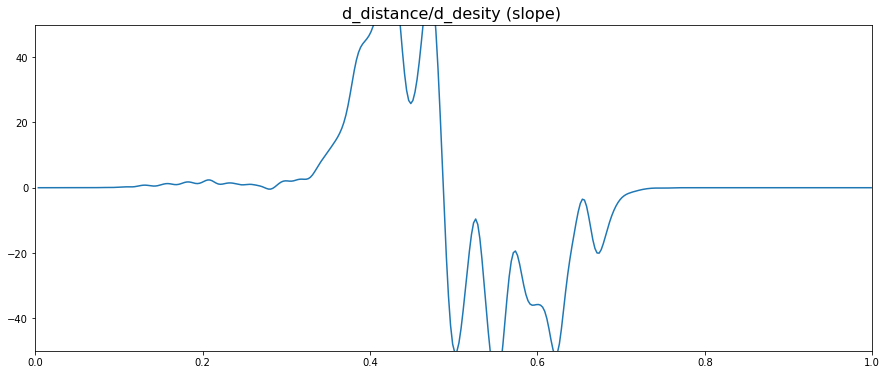

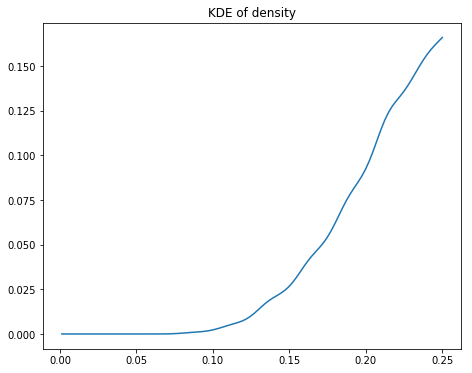

In [600]:
samplehist = _samplehist(latent)
kde = _kde(samplehist)
diffs = _diff(kde)
zeros = _findzeros(kde)
plt.figure(figsize=(15, 6))
plt.plot(_np.linspace(1.5*(1/NBINS), 1-0.5*(1/NBINS), NBINS - 1), diffs)
plt.axis([0, 1, -50, 50])
plt.title('d_distance/d_desity (slope) ', fontsize=16)

if zeros:
    plt.vlines(zeros[0], -50, 50)
    plt.vlines(zeros[-1], -50, 50)
#plt.hlines(-100, 0, 1)

plt.figure(figsize=(7.5, 6))
plt.plot(_np.linspace(0.5*(1/NBINS), 0.25, NBINS//4), kde[:100])
plt.title('KDE of density')

if zeros:
    plt.vlines(zeros[0], 0, plt.axis()[-1])
    plt.vlines(zeros[-1], 0, plt.axis()[-1])